In [1]:
import pickle
import os
import torch
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
filename = "/home/ubuntu/blip_train_features_testing_v2_0.pkl"
file = open(filename,'rb')
all_features_1 = pickle.load(file)
file.close()

filename = "/home/ubuntu/blip_train_features_testing_v2_1.pkl"
file = open(filename,'rb')
all_features_2 = pickle.load(file)
file.close()

filename = "/home/ubuntu/blip_train_features_testing_v2_2.pkl"
file = open(filename,'rb')
all_features_3 = pickle.load(file)
file.close()

filename = "/home/ubuntu/blip_train_features_testing_v2_3.pkl"
file = open(filename,'rb')
all_features_4 = pickle.load(file)
file.close()

In [4]:
filename = "/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/blip_train_features.pkl"
file = open(filename,'rb')
all_features_og = pickle.load(file)
file.close()

In [5]:
all_features = all_features_1+all_features_2+all_features_3+all_features_4

In [6]:
all_features_1

[(tensor([[-0.0711, -0.0818, -0.0331,  ...,  0.0458,  0.0221,  0.0278],
          [-0.1133, -0.0775, -0.0203,  ...,  0.0470,  0.0334,  0.0695],
          [ 0.0672, -0.0415,  0.0547,  ...,  0.0057,  0.0110, -0.0222],
          ...,
          [-0.1424, -0.0690, -0.0591,  ...,  0.1461, -0.1754,  0.0691],
          [-0.0380, -0.0538, -0.0703,  ...,  0.1417, -0.0662, -0.0052],
          [ 0.0156, -0.0240, -0.0424,  ...,  0.0536, -0.0081, -0.0113]]),
  tensor([[ 0.0132,  0.0469,  0.1020,  ...,  0.0049, -0.0789,  0.0361],
          [-0.0581,  0.0017,  0.0407,  ..., -0.0240, -0.0904,  0.0718],
          [-0.0522,  0.0138,  0.0655,  ...,  0.0275, -0.1182,  0.0559],
          ...,
          [-0.0814, -0.0007,  0.0006,  ...,  0.0194, -0.1395,  0.0482],
          [-0.0674,  0.0226,  0.0078,  ...,  0.0719, -0.1038,  0.0110],
          [-0.0498,  0.0278,  0.0176,  ..., -0.0122, -0.0716,  0.0240]])),
 (tensor([[-0.0865, -0.0101,  0.0034,  ...,  0.1169, -0.1995,  0.0567],
          [ 0.0929, -0.0972, 

In [7]:
full_pred = tuple(map(torch.concat, zip(*all_features)))
image_embed,text_embed=full_pred




In [8]:
full_pred

(tensor([[-0.0711, -0.0818, -0.0331,  ...,  0.0458,  0.0221,  0.0278],
         [-0.1133, -0.0775, -0.0203,  ...,  0.0470,  0.0334,  0.0695],
         [ 0.0672, -0.0415,  0.0547,  ...,  0.0057,  0.0110, -0.0222],
         ...,
         [-0.0635, -0.1407,  0.0335,  ...,  0.0407, -0.0980, -0.0704],
         [ 0.0711, -0.0672, -0.0405,  ...,  0.0395,  0.0789,  0.0265],
         [-0.0066,  0.1603,  0.0346,  ...,  0.0690, -0.1260, -0.0077]]),
 tensor([[ 0.0132,  0.0469,  0.1020,  ...,  0.0049, -0.0789,  0.0361],
         [-0.0581,  0.0017,  0.0407,  ..., -0.0240, -0.0904,  0.0718],
         [-0.0522,  0.0138,  0.0655,  ...,  0.0275, -0.1182,  0.0559],
         ...,
         [-0.0538,  0.0022,  0.0809,  ..., -0.0290, -0.1083,  0.0054],
         [-0.0563, -0.0269,  0.0115,  ..., -0.0333, -0.0839,  0.0766],
         [-0.0159,  0.0381,  0.0577,  ...,  0.0432, -0.1229,  0.0639]]))

In [9]:
single_pair_cosine = np.array(list((txt @ img.T).item() for txt ,img in tqdm(zip(text_embed,image_embed))))

0it [00:00, ?it/s]

/tmp/ipykernel_16387/2594336484.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2318.)
  single_pair_cosine = np.array(list((txt @ img.T).item() for txt ,img in tqdm(zip(text_embed,image_embed))))


In [ ]:
len(single_pair_cosine)

In [ ]:
single_pair_cosine

array([0.39087009, 0.38980317, 0.40770108, ..., 0.40569219, 0.40402734,
       0.36636174])

In [2]:
df = pd.read_csv("/home/ubuntu/Desktop/CVPR 2022 AliProducts Challenge/code/data/train_data_v5.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,caption,product,image_file_path,image_parent_folder,image_reletive_folder,caption_word_count,img_ext,full_path,itm_score
0,0,0,Z-Couple Shook His Head Ornaments Doll Car Dec...,O1CN01ogOt7d1DHyjGtaaWT_!!192-0-lubanu.jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,train_text_img_pairs_0/train_text_img_pairs_0_...,train_text_img_pairs_0_compressed/,20,jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,0.943550
1,1,1,Z Remote Anti-Theft Door Wireless Door Anti-Th...,O1CN01eFgq841CxMtYCpqWF_!!147-0-lubanu.jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,train_text_img_pairs_0/train_text_img_pairs_0_...,train_text_img_pairs_0_compressed/,14,jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,0.541577
2,2,2,Z Qinghai qing liang Xidan Tip outside Microme...,O1CN01fXCPeA1SzgmI1mVLf_!!2207662892318.jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,train_text_img_pairs_0/train_text_img_pairs_0_...,train_text_img_pairs_0_compressed/,16,jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,0.903737
3,3,3,Z Magic Incognito Clothes Stack Pants Multi-La...,O1CN01qgixtq1BtPqrInOuX_!!3-0-lubanu.jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,train_text_img_pairs_0/train_text_img_pairs_0_...,train_text_img_pairs_0_compressed/,19,jpg,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,0.969834
4,4,4,z ge zi yong pin yong ju ge zi zhuang men tie ...,TB1ZqfODEY1gK0jSZFCq6AwqXXa,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,train_text_img_pairs_0/train_text_img_pairs_0_...,train_text_img_pairs_0_compressed/,30,qXXa,/home/ubuntu/Desktop/CVPR 2022 AliProducts Cha...,0.554879


In [7]:
df.shape

(3853000, 11)

In [5]:
df["reletive_path"]= df["image_parent_folder"]+df["product"]

In [6]:
df.to

0          train_text_img_pairs_0/train_text_img_pairs_0_...
1          train_text_img_pairs_0/train_text_img_pairs_0_...
2          train_text_img_pairs_0/train_text_img_pairs_0_...
3          train_text_img_pairs_0/train_text_img_pairs_0_...
4          train_text_img_pairs_0/train_text_img_pairs_0_...
                                 ...                        
3852995    train_text_img_pairs_8/train_text_img_pairs_8_...
3852996    train_text_img_pairs_8/train_text_img_pairs_8_...
3852997    train_text_img_pairs_8/train_text_img_pairs_8_...
3852998    train_text_img_pairs_8/train_text_img_pairs_8_...
3852999    train_text_img_pairs_8/train_text_img_pairs_8_...
Name: reletive_path, Length: 3853000, dtype: object

In [ ]:
df["single_pair_cosine"] = single_pair_cosine



In [ ]:
df["single_pair_cosine"].max()

0.5418266654014587

In [ ]:
df["single_pair_cosine"].min()

0.056415244936943054

In [ ]:
df["single_pair_cosine"].median()

0.3976595401763916

In [ ]:
df["single_pair_cosine"].mean()

0.39453571987164776

In [ ]:
import seaborn as sns

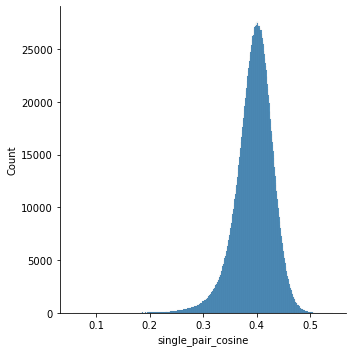

In [ ]:
sns.displot(df["single_pair_cosine"])

In [ ]:
df[df["single_pair_cosine"]<=0.30].shape[0]

63039

In [ ]:
df[df["single_pair_cosine"]<=0.32].shape[0]

123340

In [ ]:
df[df["single_pair_cosine"]<=0.33].shape[0]

176127

In [ ]:
df[df["single_pair_cosine"]<=0.35].shape[0]

374007

In [ ]:
df[df["single_pair_cosine"]<=0.4].shape[0]

2085164

In [ ]:
filtered_df  =df[df["single_pair_cosine"]>0.32]

In [ ]:
filtered_df.shape

(3807377, 7)

In [ ]:
filtered_df.to_csv("./data/train_data_v3.csv",index=False)

In [ ]:
filtered_df_inv  =df[df["single_pair_cosine"]<=0.32]

In [ ]:
filtered_df_inv

NameError: name 'filtered_df_inv' is not defined

In [ ]:
filtered_df_inv.to_csv("./data/train_data_noisy_32.csv")